In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [ ]:
#First, I'll examine the first 50 rows and the column data types to understand the dataset's structure. 
#I've noticed a language inconsistency where 'Spain' is used, which I'll correct to 'Spanish'. 
#I also see many null values in original_title
#since my analysis focuses on numerical and categorical data like language and ratings, I've decided to keep these rows for now

In [4]:
#importing dataset
df = pd.read_csv("trending.csv")

In [5]:
#standardizing view
pd.set_option('display.max.columns', None)
pd.set_option('display.width', 1000)

In [6]:
#looking at what the actual columns are and what I want to analyze
#quick rename of Spain to Spanish for langauges
df['original_language'] = df['original_language'].replace({'Spain': 'Spanish'})
print(df.head(50))

    Unnamed: 0       id                           original_title original_language release_date  popularity  vote_average  vote_count media_type  adult
0            0   638974                         Murder Mystery 2           English   2023-03-26     235.901         6.800         187      movie  False
1            1   677179                                Creed III           English   2023-03-01    1537.879         7.200         561      movie  False
2            2   726759                                   Tetris           English   2023-03-15      66.661         7.700         100      movie  False
3            3    76600                 Avatar: The Way of Water           English   2022-12-14   10224.280         7.742        6335      movie  False
4            4   849869                                      길복순            Korean   2023-02-17      33.985         6.900          39      movie  False
5            5   603692                     John Wick: Chapter 4           English   202

In [7]:
#4020 movies are null out of 16080 are null
print(df['original_title'].isna().sum())
print(df.shape[0])

4020
16080


In [8]:
#what percent of these movies are released in english?
print(df['original_language'].value_counts(normalize = True))

#original_language
#English     0.75
#Japanese    0.10
#Korean      0.05
#Spain       0.05
#Chinese     0.05

original_language
English     0.75
Japanese    0.10
Korean      0.05
Spanish     0.05
Chinese     0.05
Name: proportion, dtype: float64


In [9]:
#Questions to answer!

#######################################################################################################################
#Correlation: Is there a relationship between a movie's popularity and its average vote?
#######################################################################################################################
#Performance by Language: Do English-language films receive higher average ratings than those in other languages?
#######################################################################################################################
#Media Type Comparison: How do movies and TV shows compare in terms of popularity and vote count?
#######################################################################################################################
#Time Analysis: Are there trends in the number of popular titles released each month or year?

In [10]:
#Correlation: Is there a relationship between a movie's popularity and its average vote?
print(df['popularity'].isna().sum()) #no null values for popularity
print(df['vote_average'].isna().sum()) #no null values for vote_average

0
0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080 entries, 0 to 16079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16080 non-null  int64  
 1   id                 16080 non-null  int64  
 2   original_title     12060 non-null  object 
 3   original_language  16080 non-null  object 
 4   release_date       12060 non-null  object 
 5   popularity         16080 non-null  float64
 6   vote_average       16080 non-null  float64
 7   vote_count         16080 non-null  int64  
 8   media_type         16080 non-null  object 
 9   adult              16080 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 1.1+ MB
None
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16075    False
16076    False
16077    False
16078    False
16079    False
Length: 16080, dtype: bool>


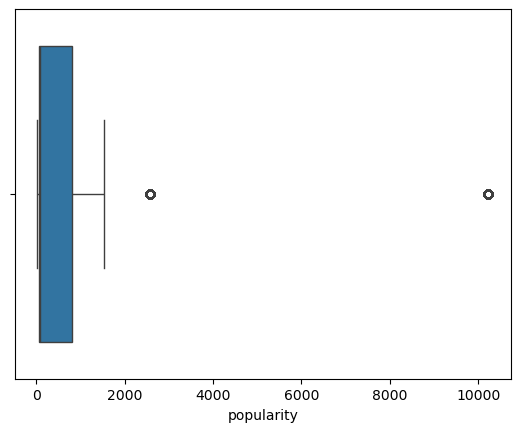

Unnamed: 0                                  3
id                                      76600
original_title       Avatar: The Way of Water
original_language                     English
release_date                       2022-12-14
popularity                           10224.28
vote_average                            7.742
vote_count                               6335
media_type                              movie
adult                                   False
Name: 3, dtype: object
R-Squared: 0.0043


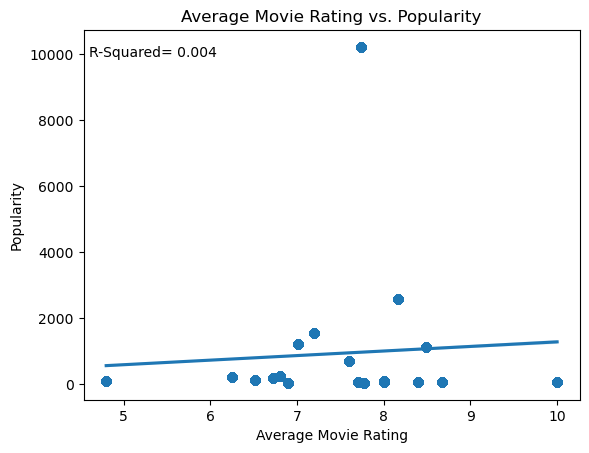

In [11]:
#do i need to drop columns that have nulls in other areas? e.g. nulls in movie name?
#deciding to not drop them if they're not related to the column I'm analyzing
print(df.info()) #everything is in the right format to analyze in
print(df.duplicated().sum) #no duplicates
sns.boxplot(x=df['popularity']) # huge outlier, what movie is that?
plt.show()
max_popularity = df.loc[df['popularity'].idxmax()] #avatar way of the water makes sense - should keep it movie broke records
print(max_popularity)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['vote_average'],df['popularity'])
r_squared = r_value**2
sns.regplot(x='vote_average', y='popularity', data = df)
plt.annotate(f"R-Squared= {r_squared:.3f}", (4.6, 9.93e+03))

print(f"R-Squared: {r_squared:.4f}")
plt.title('Average Movie Rating vs. Popularity')
plt.xlabel('Average Movie Rating')
plt.ylabel('Popularity')
plt.show()

In [ ]:
#To determine if a movie's rating correlates with its popularity, I performed a linear regression analysis. 
#The resulting R-Squared value is 0.004. This extremely low value indicates that only 0.4% of the variance in popularity can be explained by the vote average. 
#Therefore, we can conclude that there is no meaningful linear relationship between a movie's average rating and its popularity in this dataset. 
#A high rating does not imply high popularity, and vice-versa.

original_language
English     0.75
Japanese    0.10
Korean      0.05
Spanish     0.05
Chinese     0.05
Name: proportion, dtype: float64
0


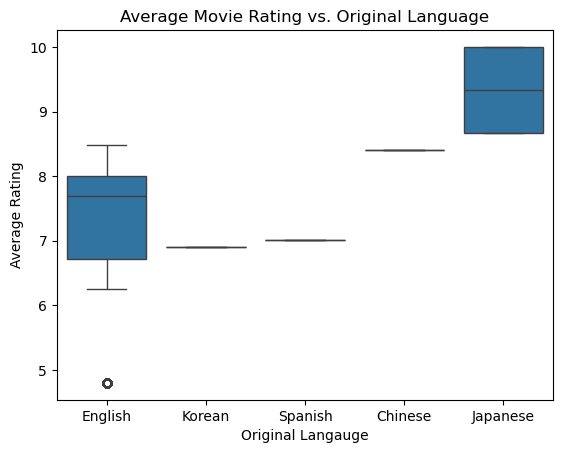

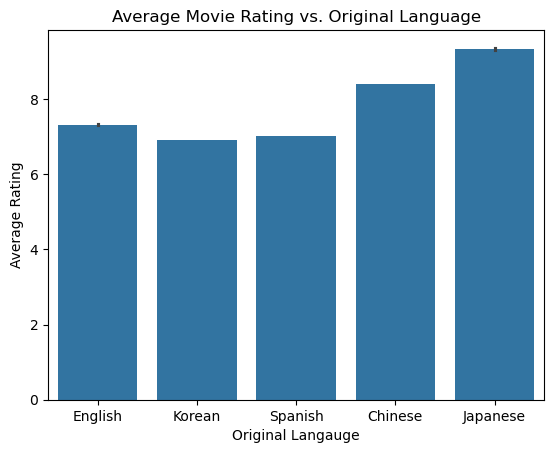

In [12]:
#Performance by Language: Do English-language films receive higher average ratings than those in other languages?
print(df['original_language'].value_counts(normalize=True))
#original_language
#English     0.75
#Japanese    0.10
#Korean      0.05
#Spain       0.05
#Chinese     0.05
#how many original language records are null?
print(df['original_language'].isna().sum())
#how many original language records are null?
sns.boxplot(data = df, x='original_language', y='vote_average')
plt.title("Average Movie Rating vs. Original Language")
plt.xlabel('Original Langauge')
plt.ylabel('Average Rating')
plt.show()
sns.barplot(data = df, x='original_language', y='vote_average')
plt.title("Average Movie Rating vs. Original Language")
plt.xlabel('Original Langauge')
plt.ylabel('Average Rating')
plt.show()
# Japanese movies have the highest ratings!

       Unnamed: 0      id original_title original_language release_date  popularity  vote_average  vote_count media_type  adult
14             14  921355       Assassin           English   2023-03-31      80.805           4.8          11      movie  False
15             15  117465            NaN          Japanese          NaN      62.392          10.0           4         tv  False
34             34  921355       Assassin           English   2023-03-31      80.805           4.8          11      movie  False
35             35  117465            NaN          Japanese          NaN      62.392          10.0           4         tv  False
54             54  921355       Assassin           English   2023-03-31      80.805           4.8          11      movie  False
...           ...     ...            ...               ...          ...         ...           ...         ...        ...    ...
16035       16035  117465            NaN          Japanese          NaN      62.392          10.0       

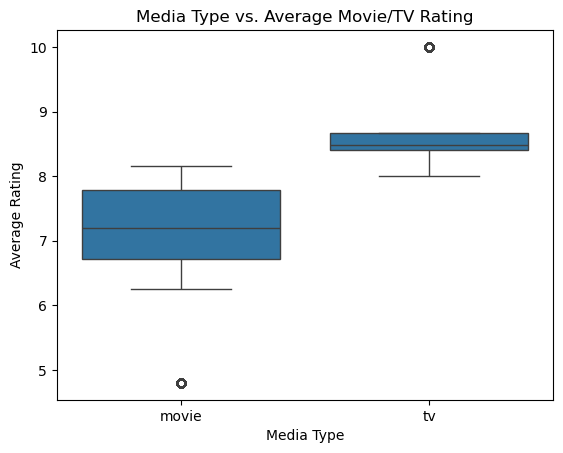

In [14]:
#Media Type Comparison: How do movies and TV shows compare in terms of popularity and vote count?
#check if outlier is valid
Q1 = df['vote_average'].quantile(0.25)
Q3 = df['vote_average'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3+ 1.5*IQR
outliers = df[(df['vote_average']<lower_bound) | (df['vote_average']>upper_bound)]
print(outliers)
movies = df[df['media_type'] == 'movie']['vote_average']
tv_shows = df[df['media_type'] == 'tv']['vote_average']
t_stat, p_value = stats.ttest_ind(tv_shows, movies, equal_var=False)
print(f"T-Statistic: {t_stat: .4f}")
print(f"P-Value: {p_value}")
if p_value <0.05:
    print("\n We reject the null hypothesis that there is no statistical significance between the average rating of TV Shows and Movies")
else:
    print("\n We fail to reject the null hypothesis that there is no statistical significance between the average rating of TV Shows and Movies")


plt.title('Media Type vs. Average Movie/TV Rating')
plt.xlabel('Media Type')
plt.ylabel('Average Rating')
sns.boxplot(data = df, x='media_type', y='vote_average')
plt.show()


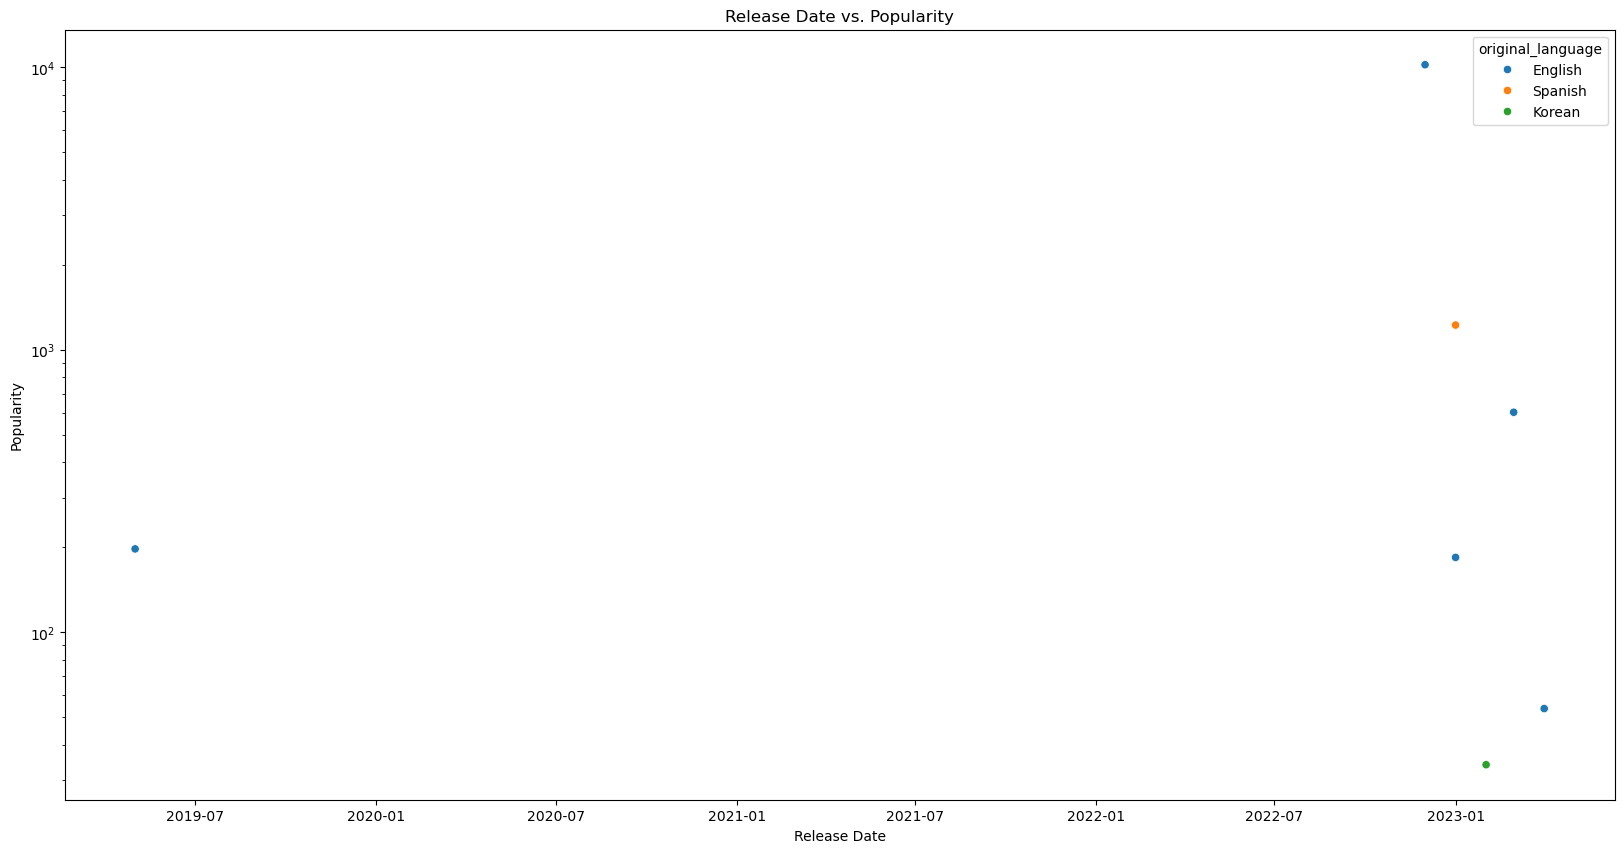

In [15]:
#Time Analysis: Are there trends in the number of popular titles released each month or year?
df_cleaned = df.dropna(subset=['release_date', 'popularity', 'original_language']).copy()
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])

#create a column for the release month
df_cleaned['release_month'] = df_cleaned['release_date'].dt.to_period('M')

# 3. Group by month and language, and calculate the average popularity
monthly_data = df_cleaned.groupby(['release_month', 'original_language'])['popularity'].mean().reset_index()


# Convert the 'Period' type to a 'Timestamp' for plotting
monthly_data['release_month'] = monthly_data['release_month'].dt.to_timestamp()

#Plot the final aggregated data
plt.figure(figsize=(20, 10))
sns.scatterplot(x='release_month', y='popularity', hue='original_language', data=monthly_data)
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.yscale('log')
plt.title('Release Date vs. Popularity')
#needed bc english is sm higher than the other languages
plt.show()